# Joins

We will use the design produced in [004-Design](./004-Design.ipynb). Please execute that notebook first to define and populate the `app` schema.

## Recall the design

The following code connects to the `app` schema and generates Python classes to access its classes.

[2023-10-18 00:23:08,510][INFO]: Connecting root@fakeservices.datajoint.io:3306
[2023-10-18 00:23:08,678][INFO]: Connected root@fakeservices.datajoint.io:3306


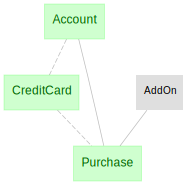

In [1]:
import datajoint as dj
schema = dj.Schema('app')
schema.spawn_missing_classes()
dj.Diagram(schema)

In [2]:
Purchase()

phone,addon_id,card_number,purchase_date
10003214241,2,3520297695692928,2023-10-16
10022078153,2,4546564315552,2023-09-23
10023766171,2,4172145827635662,2023-10-13
10042418609,1,2718365867267078,2023-10-09
10042418609,2,2718365867267078,2023-10-06
10044400960,1,639056218170,2023-09-28
10044400960,2,639056218170,2023-10-15
10044400960,3,639056218170,2023-10-03
10055219928,3,6545197332426314,2023-10-06
10060050070,1,2281998195666921,2023-09-28


# Queries with Joins

## Cross Join

In [3]:
Account * AddOn

phone,addon_id,first_name,last_name,dob,sex,addon_name,price
10003214241,3,Samantha,Johnson,1948-01-03,F,Sprint,100.00
10003214241,2,Samantha,Johnson,1948-01-03,F,Marathon,26.20
10003214241,1,Samantha,Johnson,1948-01-03,F,Track & Field,13.99
10013304597,3,Keith,Page,1981-06-02,M,Sprint,100.00
10013304597,2,Keith,Page,1981-06-02,M,Marathon,26.20
10013304597,1,Keith,Page,1981-06-02,M,Track & Field,13.99
10019792010,3,Greg,Matthews,1964-06-26,M,Sprint,100.00
10019792010,2,Greg,Matthews,1964-06-26,M,Marathon,26.20
10019792010,1,Greg,Matthews,1964-06-26,M,Track & Field,13.99
10022078153,3,Tammy,Thompson,1998-02-18,F,Sprint,100.00


In [4]:
Account * AddOn & 'sex="F"'

phone,addon_id,first_name,last_name,dob,sex,addon_name,price
10003214241,3,Samantha,Johnson,1948-01-03,F,Sprint,100.00
10003214241,2,Samantha,Johnson,1948-01-03,F,Marathon,26.20
10003214241,1,Samantha,Johnson,1948-01-03,F,Track & Field,13.99
10022078153,3,Tammy,Thompson,1998-02-18,F,Sprint,100.00
10022078153,2,Tammy,Thompson,1998-02-18,F,Marathon,26.20
10022078153,1,Tammy,Thompson,1998-02-18,F,Track & Field,13.99
10039535776,3,Rachel,Grant,1910-04-13,F,Sprint,100.00
10039535776,2,Rachel,Grant,1910-04-13,F,Marathon,26.20
10039535776,1,Rachel,Grant,1910-04-13,F,Track & Field,13.99
10042418609,3,Kimberly,Hoffman,1934-07-15,F,Sprint,100.00


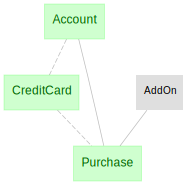

In [5]:
dj.Diagram(schema)

In [6]:
Purchase * AddOn

phone,addon_id,card_number,purchase_date,addon_name,price
10042418609,1,2718365867267078,2023-10-09,Track & Field,13.99
10044400960,1,639056218170,2023-09-28,Track & Field,13.99
10060050070,1,2281998195666921,2023-09-28,Track & Field,13.99
10072019284,1,630407400153,2023-09-28,Track & Field,13.99
10078599367,1,4136620931171361,2023-10-09,Track & Field,13.99
10088316347,1,6011604533791565,2023-10-09,Track & Field,13.99
10226538724,1,370912314920636,2023-10-10,Track & Field,13.99
10230780871,1,213190894208166,2023-09-29,Track & Field,13.99
10265798436,1,4989531517878,2023-09-23,Track & Field,13.99
10273472573,1,376477384260234,2023-09-25,Track & Field,13.99


In [18]:
Purchase * AddOn

phone,addon_id,card_number,purchase_date,addon_name,price
10042418609,1,2718365867267078,2023-10-09,Track & Field,13.99
10044400960,1,639056218170,2023-09-28,Track & Field,13.99
10060050070,1,2281998195666921,2023-09-28,Track & Field,13.99
10072019284,1,630407400153,2023-09-28,Track & Field,13.99
10078599367,1,4136620931171361,2023-10-09,Track & Field,13.99
10088316347,1,6011604533791565,2023-10-09,Track & Field,13.99
10226538724,1,370912314920636,2023-10-10,Track & Field,13.99
10230780871,1,213190894208166,2023-09-29,Track & Field,13.99
10265798436,1,4989531517878,2023-09-23,Track & Field,13.99
10273472573,1,376477384260234,2023-09-25,Track & Field,13.99


In [20]:
@schema
class Person(dj.Manual):
    definition = """
    person_id : int 
    --- 
    full_name : varchar(60)
    """
  
@schema
class Dependent(dj.Manual):
    definition = """
    -> Person
    -> Person.proj(provider_id="person_id")
    """

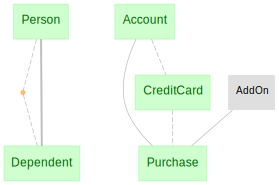

In [21]:
dj.Diagram(schema)

In [23]:
Person.insert((
    (1, "Bob"),
    (2, "Anne"),
    (3, "Dave"),
    (4, "Carol")
))

In [24]:
Dependent.insert1((2, 1))

In [26]:
Dependent.insert1((3, 1))

In [28]:
Dependent.insert1((4, 2))

In [36]:
Person * Dependent * Person.proj(provider_id="person_id", provider_full_name="full_name")

person_id,provider_id,full_name,provider_full_name
2,1,Anne,Bob
3,1,Dave,Bob
4,2,Carol,Anne
